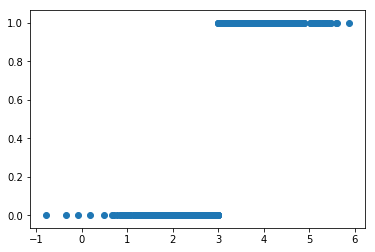

1000 [ 2.38690329] [-7.02968884] loss: 0.600216
2000 [ 3.89096951] [-11.59830952] loss: 0.569248
3000 [ 5.23103523] [-15.64813232] loss: 0.554414
4000 [ 6.54647684] [-19.61327362] loss: 0.545271
5000 [ 7.87836361] [-23.62090111] loss: 0.53898
6000 [ 9.21405792] [-27.6347847] loss: 0.534454
7000 [ 10.50539207] [-31.51147842] loss: 0.531167
0.3 [  4.82468178e-13]
-0.3 [  8.83096328e-16]
3 [ 0.50117445]
-3 [  4.24069022e-28]
[ 10.50539207] [-31.51147842]


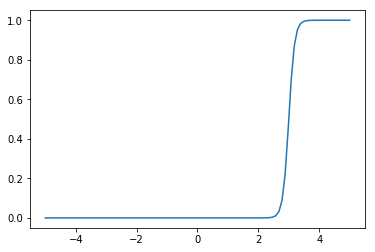

In [10]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

#https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py
#cross entropy is equal to maximum likelihood
learning_rate = 0.01
batch_size = 500

def sigmoid(z):
    return 1./(1+tf.exp(-z))
#endf 

x = tf.placeholder(tf.float32, shape=(None, 1))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
#with tf.variable_scope()
#w = tf.get_variable(name='w', shape=(1)) 
#b = tf.get_variable(name='b',shape=(1))
W = tf.Variable(tf.random_normal([1], stddev=0.1))
B = tf.Variable(tf.random_normal([1], stddev=0.1))
y = sigmoid(x * W + B)

#data
size = 1000
X = [np.float32(i) for i in np.random.normal(3, 1, size)]
Y = [ 1. if m>3 else 0. for m in X ]
plt.scatter(X, Y)
plt.show()
#Y = [ 1. if x>0 else 0. for x in X ] here x will overwrite the original x
#print X, Y
#X = tf.convert_to_tensor(X_, dtype=tf.float32)
#Y = tf.convert_to_tensor(Y_, dtype=tf.float32)

###### same as softmax with 2 dimension, but softmax got two values
#loss = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices=1)) ## wrong, no zero item
#loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=tf.clip_by_value(y,1e-8,1.0))
###### you must add clip_by_value to clip which ensures getting rid of nan
loss = tf.reduce_mean(-y_*tf.log(tf.clip_by_value(y, 1e-8,1.0)) -(1-y_)*tf.log(tf.clip_by_value(1-y, 1e-8,1.0)))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in xrange(7000):
        start = (i*batch_size)%size
        end = min(start+batch_size, size)
        xin = np.array(X[start:end]).reshape(end-start, 1)
        yin = np.array(Y[start:end]).reshape(end-start, 1)
        #xtest = np.array(X[1]).reshape(end-start, 1)
        #ytest = np.array(X[1]).reshape(end-start, 1)
        
        #print "xin type", type(xin)
        sess.run(optimizer, feed_dict={x:xin, y_:yin})

        if i%1000 == 999:
            print i+1, sess.run(W), sess.run(B), 
            #print "loss:", sess.run(tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y) + (1-y_)*tf.log(1-y))), feed_dict={x:xin, y_:yin})
            loss = sess.run(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=tf.clip_by_value(y,1e-8,1.0)), feed_dict={x:xin, y_:yin})
            print "loss:", sess.run(tf.reduce_mean(loss)) 
            #print "loss:", sess.run(tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y))), feed_dict={x:xin, y_:yin})

    print 0.3, sess.run(sigmoid(0.3 * sess.run(W) + sess.run(B)))
    print -0.3, sess.run(sigmoid(-0.3 * sess.run(W) + sess.run(B)))
    print 3, sess.run(sigmoid(3 * sess.run(W) + sess.run(B)))
    print -3, sess.run(sigmoid(-3 * sess.run(W) + sess.run(B)))
    

    p = np.linspace(-5, 5, 100)
    w = np.float32(sess.run(W))
    b = np.float32(sess.run(B))
    print w, b
    q = sess.run(sigmoid(p * w + b))
    plt.plot(p, q)
            